Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn import metrics

Loading the dataset

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Convert the character data type to integer

In [ ]:
df.replace({'sex':{'male':1,'female':0}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Split the data into X and Y (independent and dependent variables)

In [ ]:
x = df.drop(columns='charges',axis=1)
y = df['charges']

Visualize the data

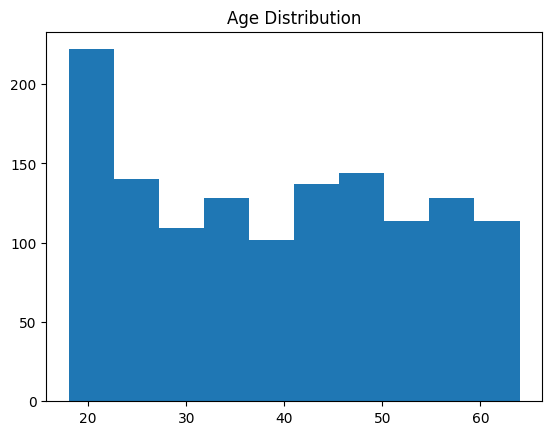

In [ ]:
plt.hist(x['age'])
plt.title('Age Distribution')
plt.show()

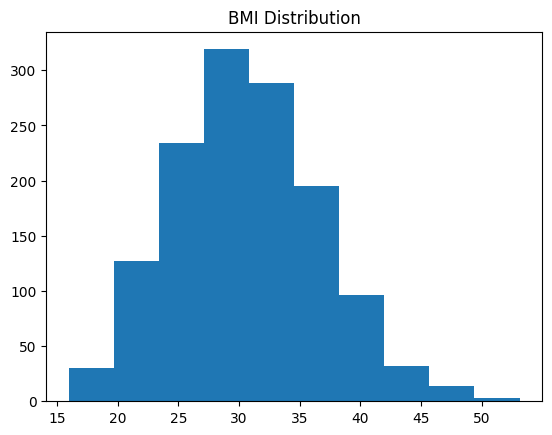

In [ ]:
plt.hist(x['bmi'])
plt.title('BMI Distribution')
plt.show()

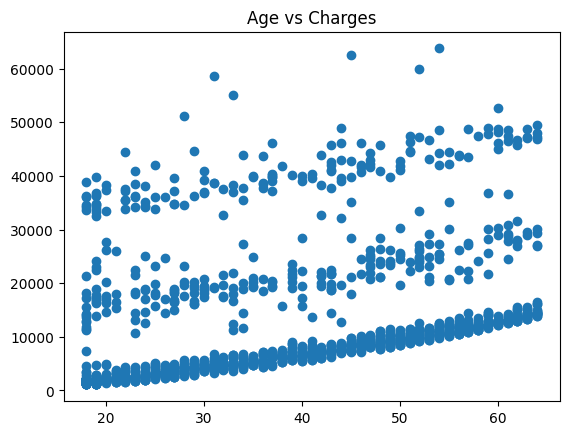

In [ ]:
plt.scatter(x['age'],y)
plt.title('Age vs Charges')
plt.show()

Split the data into training and testing data at the ratio of 8:2

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Fit the model(Linear Regression)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
accuracy = model.score(x_test,y_test)
print(f"Accuracy:{accuracy}")

Accuracy:0.7447273869684076


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
rms = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error:{rms}")

Root Mean Squared Error:6191.690842285236


ElasticNet Model

In [ ]:
alpha = 0.1  # regularization parameter
l1_ratio = 0.5  # mixing parameter, 0 <= l1_ratio <= 1
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=1)

# Fit the model
elastic_net.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net.predict(x_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rms = np.sqrt(mse)
print(f"Mean Squared Error:{rms}")
accuracy = elastic_net.score(x_test,y_test)
print(f"Accuracy {accuracy}")

Mean Squared Error: 42870006.9585764
Mean Squared Error:6547.519145338668
Accuracy 0.714543950565258


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

NameError: name 'x_train' is not defined